# Exercise 1: Plotting House Prices

you can approach this in a number of ways, Excel, Python, R, etc. I will use Python and the Pandas library to do this.

Whichever tool you use, you will need to do the following:

1. load the data 
2. validate the data has loaded correctly
3. check the data types
4. (if necessary) clean the data, correct any data types
5. plot the data
6. refine the plot

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
# These import statements give us the libraries
# we need to work with data and to create plots
# the 'as' keyword lets us give these libraries aliases
# so we don't have to type out their full names each time

## 1. Load the data

Pandas (like `R`) has the concept of a `dataframe`.  Dataframes are a way to store data in a tabular format (like a spreadsheet).  

Pandas is exceptionally efficient at handling large datasets and is a great tool for data manipulation and analysis.

To load the data, we use the `read_csv` function.  This function reads a CSV file and returns a dataframe.

```python
import pandas as pd
df = pd.read_csv('data.csv')
```

In these two lines of code, we have imported the pandas library and read the data from a CSV file into a dataframe called `df`.

`df` is a common name for a dataframe, but you can call it whatever you like.  It is a good idea to give your variables meaningful names so that you can easily understand what they are when you come back to your code later.  Because our data is simple, and will not be aggregated with other data, we can call it `house_prices`.





In [48]:
# load houseprices.csv into a dataframe called house_prices
house_prices = pd.read_csv('houseprices.csv')

# validate that house_prices is a dataframe
type(house_prices)

pandas.core.frame.DataFrame

## 2. Validate the data has loaded correctly

This step is crucial.  There are some fundamental questions you should ask yourself:

+ does the data look complete?
+ are the data types correct?
+ are there any missing values?



### 2.1 Does the data look complete?

Our data is simple.  We can quickly scan it by eye to understand what we should be seeing.  There are some tools we can use to externally validate this.  In most cases, we'd want to do both.  You can only _really_  trust the data if you have validated it in multiple ways.

In [49]:
# do we have the correct number of columns, rows?
# Let's validate this using system tools
!echo "There are "$(wc -l < houseprices.csv)" rows in the file (including header)"
!echo "There are "$(head -1 houseprices.csv | tr ',' '\n' | wc -l)" columns in the file"
# Pandas should agree with this number.  If it doesn't 
# we have a problem.  Let's check.
shape = house_prices.shape
print("There are", shape[0], "rows and", shape[1], "columns in the dataframe")

There are  570 rows in the file (including header)
There are  2 columns in the file
There are 569 rows and 2 columns in the dataframe


### 2.2 Are there any missing values?

Missing values are a common issue in data science.  They can be caused by a number of factors, including:

+ poor data quality (e.g., the data was not collected correctly)
+ data corruption (e.g., a file is not saved correctly)
+ loading issues (e.g., the data is too large, or the loading process is interrupted)

to check for missing values, we can use the `isnull` method of the dataframe.  This will return a dataframe of the same shape as the original, but with `True` where there is a missing value and `False` where there is not.  Rather than looking at the entire dataframe, we can use the `sum` method to get a count of missing values in each column.


In [50]:
missing_values = house_prices['Value'].isnull().sum()
missing_dates = house_prices['Date'].isnull().sum()

print("There are", missing_values, "missing values in the Value column")
print("There are", missing_dates, "missing values in the Date column")

There are 0 missing values in the Value column
There are 0 missing values in the Date column


## 3. Are the data types correct?
This is a crucial, but easy step.  We can use the `dtypes` attribute of the dataframe to check the data types of each column.

```python
house_prices.dtypes
```
This will give you a list of columns and their associated data types.  Typically, pandas will infer the data types correctly, but it is always worth checking, particularly if you have not extracted the data yourself.

Common data types you should expect to see are:

+ `int64` - a 64-bit integer e.g., `1`, `2`, `3`
+ `float64` - a 64-bit floating point number e.g., `1.0`, `2.0`, `3.0`
+ `object` - a string e.g., `'hello'`, `'world'`
+ `datetime64` - a datetime object e.g., `2019-01-01 00:00:00`
+ `bool` - a boolean value e.g., `True`, `False`

In my experience, the most common issue is that a column that should be a number is a string.  This can happen if the data is not clean.  For example, if a column contains a number and a string, pandas will infer the data type as a string.  This is because it is not possible to convert a string to a number.  This is a common issue and can be fixed by cleaning the data.

In [51]:
# print the data types of each column
print(house_prices.dtypes)

Date     object
Value    object
dtype: object


We will need to correct this. If pandas thinks we are dealing solely with strings, we will not be able to interrogate, manipulate or plot the data. Let's correct that by converting the data to the correct type.


## 4. Clean the data

We don't have any missing data, but we do have some data types that are incorrect.  We can use the `astype` method to convert the data types of the columns.  This method takes a dictionary of column names and data types.  We can use the `dtypes` attribute of the dataframe to get the current data types. For casting to date, we can use the `pd.to_datetime` function.


In [52]:
## convert the Date column to a datetime
house_prices['Date'] = pd.to_datetime(house_prices['Date'])
## convert the value column to a float
house_prices['Value'] = house_prices['Value'].astype(float)


# finally, do we not have datetimes and floats?  
print(house_prices.dtypes)



Date     datetime64[ns]
Value           float64
dtype: object


Before we move on, let's  dig into the data a little more.  There's many ways to do this, but a good first step is to look for the minumum and maximum values in each column.  This can give us a sense of the range of the data and whether there are any obvious outliers.

In [53]:
# do a sanity check to make sure the data types have been converted
# what are the earliest and latest dates in the dataset?
print("earliest date: "+ str(house_prices['Date'].min()))
print("latest date: "+ str(house_prices['Date'].max()))
# and what are the min and max values?
print("min value: "+ str(house_prices['Value'].min()))
print("max value: "+ str(house_prices['Value'].max()))

earliest date: 1890-12-01 00:00:00
latest date: 2017-10-01 00:00:00
min value: 92.74
max value: 286.96


In [54]:
# the describe method gives us a quick overview of the data
# such as the mean, standard deviation, min, max, and quartiles
# this can be a good way to spot outliers
house_prices.describe()

,Date,Value
count,569,569.000000
mean,1985-09-26 15:16:08.014059776,187.530861
min,1890-12-01 00:00:00,92.740000
25%,1972-12-01 00:00:00,164.900000
50%,1994-02-01 00:00:00,175.900000
75%,2005-12-01 00:00:00,212.490000
max,2017-10-01 00:00:00,286.960000
std,NaN,39.067651


Looking good! If we scan the original data we can see these values look reasonable. One final check we can do is to have a look at the first few and last few lines of the data. This can help us to understand the structure of the data and whether there are any obvious issues.

There's two ways to do this, we can either call the `.head()` and `.tail()` methods on the dataframe. because we're using a notebook we can also call the dataframe directly and it will render the data in a nice format which saves us a little typing.

In [55]:
# the long way; using `head to show the first  5 rows
house_prices.head()

,Date,Value
0,2017-10-01,248.68
1,2017-09-01,248.11
2,2017-08-01,248.74
3,2017-07-01,248.37
4,2017-06-01,246.57


In [56]:
# and the last 5 rows
house_prices.tail()

,Date,Value
564,1894-12-01,194.75
565,1893-12-01,155.97
566,1892-12-01,138.39
567,1891-12-01,137.56
568,1890-12-01,145.15


In [57]:
# the short way calling the data frame directly
house_prices

,Date,Value
0,2017-10-01,248.68
1,2017-09-01,248.11
2,2017-08-01,248.74
3,2017-07-01,248.37
4,2017-06-01,246.57
...,...,...
564,1894-12-01,194.75
565,1893-12-01,155.97
566,1892-12-01,138.39
567,1891-12-01,137.56


Once we're happy with the data, we can begin the process of plotting it.

## 5. Plot the data

We can use the `plot` method of the dataframe to plot the data.  This method is a wrapper around the `matplotlib` library, which is a powerful plotting library in Python.  The `plot` method has a number of arguments that allow us to customise the plot.  We can use the `kind` argument to specify the type of plot we want to create.  In this case, we want to create a line plot, so we will use `kind='line'`.

Because we have a mix of single values per year, and multiple, we will need to aggregate the data.  We can use the `groupby` method of the dataframe to do this.  This method takes a column name and groups the data by that column.  We can then use the `mean` method to get the average value for each group.  In this case, we want to group by the `year` column and get the average value of the `price` column.


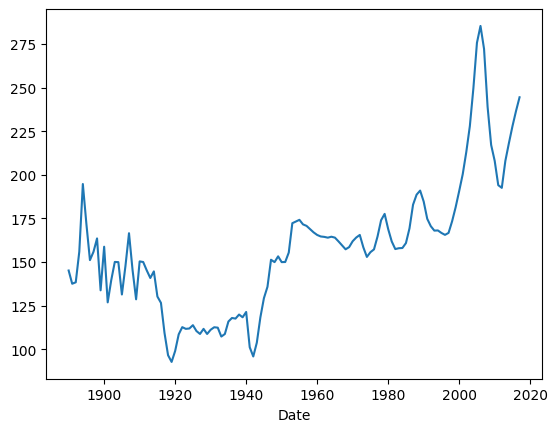

In [58]:
# plot it; date as x-axis, price as y-axis
house_prices.groupby(house_prices['Date'].dt.year)['Value'].mean().plot(kind='line')
plt.show()

the plot looks good, but we should add some labels to the axes. We should also add a title to the plot.

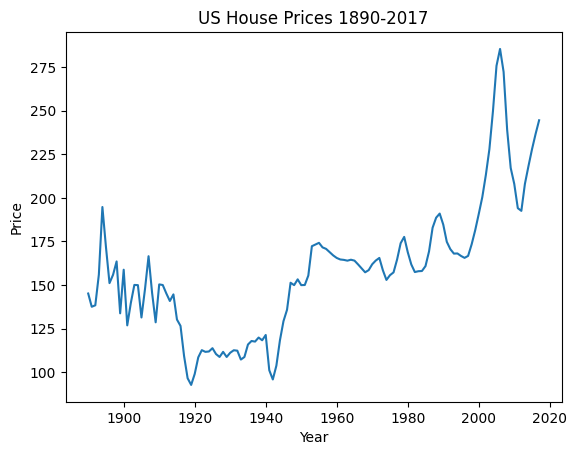

In [59]:
# repeat the plot
house_prices.groupby(house_prices['Date'].dt.year)['Value'].mean().plot(kind='line')
# add a meaningful title to the plot
plt.title('US House Prices 1890-2017')
# add a label to the y-axis "Price"
plt.ylabel('Price')
# add a label to the x-axis "Year"
plt.xlabel('Year')
# save the plot as a png file
plt.savefig('houseprices.png')


Nate Silver reports that 

> "After adjusting for inflation a $10,000 investment in a home in 1896 would be worth just $10,600 in 1996. The rate of return had been less in a century than the stock market typically produces in a year."

Is this an honest representation of the data?  Let's add a line to the plot that shows the return on a $10,000 investment in 1896.  We can do this by creating a new column in the dataframe that represents the return on a $10,000 investment in 1896.  We can then plot this column on the same plot as the average house price.

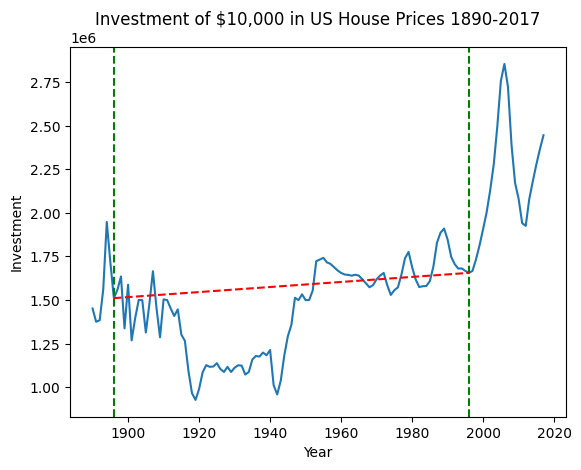

In [60]:
# add an additional column to the dataframe "investment of 10000"
house_prices['investment'] = 10000*house_prices['Value']
# and plot it
house_prices.groupby(house_prices['Date'].dt.year)['investment'].mean().plot(kind='line')
plt.title('Investment of $10,000 in US House Prices 1890-2017')
plt.ylabel('Investment')
plt.xlabel('Year')
# add a trendline running from 1896 to 1996
plt.axvline(x=1896, color='g', linestyle='--')
plt.axvline(x=1996, color='g', linestyle='--')
# plot a line between the two points
plt.plot([1896, 1996], \
            [10000*house_prices[house_prices['Date'].dt.year==1896]['Value'].mean(), \
            10000*house_prices[house_prices['Date'].dt.year==1996]['Value'].mean()], color='r', linestyle='--')
plt.savefig('investment.png')
plt.show()